In [1]:
import pandas as pd
import numpy as np

In [2]:
#in results.pkl ci sono le labels e le probabilità di ogni classe calcolate dal modello per ciascuna riga
results=pd.read_pickle('cv_results.pkl')

In [3]:
results.isnull().sum().sum()

0

In [4]:
#Funzioni di supporto
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="black" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
def print_scores(test_labels, test_probs, ):
    print('\nClassification Report\n')
    classes = ["Ortorombic","Tetragonal","Monoclinic","Trigonal","Hexagonal","Triclinic","Cubic"]
    print(classification_report(labels, preds, target_names=classes))
    accuracy = accuracy_score(labels, preds)
    print('\nAccuracy: {:.2f}\n'.format(accuracy))

    print('Micro Precision: {:.2f}'.format(precision_score(labels, preds, average='micro')))
    print('Micro Recall: {:.2f}'.format(recall_score(labels, preds, average='micro')))
    print('Micro F1-score: {:.2f}\n'.format(f1_score(labels, preds, average='micro')))

    print('Macro Precision: {:.2f}'.format(precision_score(labels, preds, average='macro')))
    print('Macro Recall: {:.2f}'.format(recall_score(labels, preds, average='macro')))
    print('Macro F1-score: {:.2f}\n'.format(f1_score(labels, preds, average='macro')))

    print('Weighted Precision: {:.2f}'.format(precision_score(labels, preds, average='weighted')))
    print('Weighted Recall: {:.2f}'.format(recall_score(labels, preds, average='weighted')))
    print('Weighted F1-score: {:.2f}'.format(f1_score(labels, preds, average='weighted')))
    cm=confusion_matrix(labels, preds)
    plot_confusion_matrix(cm,target_names=classes, normalize=True,)
    return accuracy

In [5]:
labels = results['class'].values
labels=labels.astype(int)
probabilities=results[[0,1,2,3,4,5,6]]

In [6]:
probabilities

,0,1,2,3,4,5,6
0,2.464135e-01,0.382706,1.030497e-02,0.352580,7.424503e-03,4.601666e-04,1.109152e-04
1,1.910887e-03,0.997878,5.196236e-05,0.000071,1.702893e-06,1.118120e-05,7.517177e-05
2,9.569720e-01,0.002267,3.397947e-02,0.004631,2.001674e-03,1.483321e-04,9.422543e-08
3,2.850964e-03,0.996319,1.042006e-04,0.000504,7.331621e-06,2.165716e-05,1.933711e-04
4,9.829594e-01,0.000293,1.635207e-02,0.000271,1.009864e-04,2.365739e-05,8.503780e-10
...,...,...,...,...,...,...,...
400142,1.511790e-02,0.000001,9.488669e-01,0.000002,2.734943e-08,3.601201e-02,2.263872e-07
400143,2.642542e-03,0.010716,3.135896e-04,0.387378,5.984507e-01,3.638909e-05,4.631773e-04
400144,8.839422e-08,0.000002,4.512727e-07,0.999961,1.871252e-05,9.332835e-08,1.728826e-05
400145,7.538303e-06,0.000703,4.878033e-06,0.000278,1.452645e-05,6.949841e-07,9.989912e-01


In [7]:
preds = probabilities.apply(np.argmax, axis=1).values

In [8]:
print('\nClassification Report\n')
classes=["Ortorombic","Tetragonal","Monoclinic","Trigonal","Hexagonal","Triclinic","Cubic"]
print(classification_report(labels, preds, target_names=classes))


Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.53      0.61      0.57     67120
  Tetragonal       0.67      0.64      0.66     16087
  Monoclinic       0.66      0.71      0.68    186325
    Trigonal       0.68      0.65      0.67     12881
   Hexagonal       0.76      0.71      0.74      8180
   Triclinic       0.65      0.49      0.56     92937
       Cubic       0.96      0.96      0.96     16613

    accuracy                           0.65    400143
   macro avg       0.70      0.68      0.69    400143
weighted avg       0.65      0.65      0.65    400143



In [9]:
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(labels, preds)))

print('Micro Precision: {:.2f}'.format(precision_score(labels, preds, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(labels, preds, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(labels, preds, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(labels, preds, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(labels, preds, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(labels, preds, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(labels, preds, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(labels, preds, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(labels, preds, average='weighted')))


Accuracy: 0.65

Micro Precision: 0.65
Micro Recall: 0.65
Micro F1-score: 0.65

Macro Precision: 0.70
Macro Recall: 0.68
Macro F1-score: 0.69

Weighted Precision: 0.65
Weighted Recall: 0.65
Weighted F1-score: 0.65


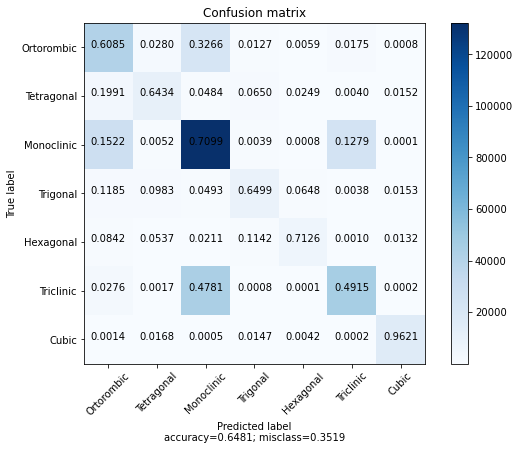

[[ 40840   1879  21922    854    398   1175     52]
 [  3203  10351    779   1045    400     65    244]
 [ 28361    976 132277    724    140  23823     24]
 [  1527   1266    635   8372    835     49    197]
 [   689    439    173    934   5829      8    108]
 [  2567    156  44435     73      8  45682     16]
 [    24    279      8    245     69      4  15984]]


In [10]:
cm=confusion_matrix(labels, preds)
plot_confusion_matrix(cm,target_names=classes, normalize=True,)
print(cm)

---

## Confidence 

In [11]:
#Proviamo a droppare le righe nelle quali la differenza tra la prima probavilità e la seconda è minore
#di una soglia 
confidence = pd.DataFrame(columns=[['Threshold', 'Accuracy','% dropped']])
results=pd.read_pickle('cv_results_conf.pkl')
results

,class,0,1,2,3,4,5,6,conf
0,0,2.464135e-01,0.382706,1.030497e-02,0.352580,7.424503e-03,4.601666e-04,1.109152e-04,0.030127
1,1,1.910887e-03,0.997878,5.196236e-05,0.000071,1.702893e-06,1.118120e-05,7.517177e-05,0.995967
2,0,9.569720e-01,0.002267,3.397947e-02,0.004631,2.001674e-03,1.483321e-04,9.422543e-08,0.922993
3,1,2.850964e-03,0.996319,1.042006e-04,0.000504,7.331621e-06,2.165716e-05,1.933711e-04,0.993468
4,0,9.829594e-01,0.000293,1.635207e-02,0.000271,1.009864e-04,2.365739e-05,8.503780e-10,0.966607
...,...,...,...,...,...,...,...,...,...
400142,2,1.511790e-02,0.000001,9.488669e-01,0.000002,2.734943e-08,3.601201e-02,2.263872e-07,0.912855
400143,3,2.642542e-03,0.010716,3.135896e-04,0.387378,5.984507e-01,3.638909e-05,4.631773e-04,0.211073
400144,3,8.839422e-08,0.000002,4.512727e-07,0.999961,1.871252e-05,9.332835e-08,1.728826e-05,0.999943
400145,6,7.538303e-06,0.000703,4.878033e-06,0.000278,1.452645e-05,6.949841e-07,9.989912e-01,0.998288


<AxesSubplot:ylabel='Frequency'>

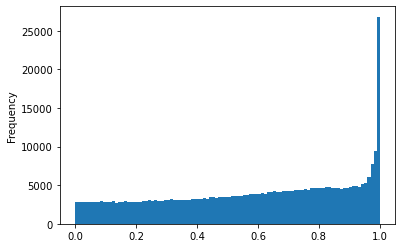

In [12]:
%matplotlib inline
results['conf'].plot.hist(bins=100)

************************************
THRESHOLD 0  INDEXES TO DROP:  0
LEN FILTERED  400143
LEN UNFILTERED  400143
Percentuale casi eliminati 0.0 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.53      0.61      0.57     67120
  Tetragonal       0.67      0.64      0.66     16087
  Monoclinic       0.66      0.71      0.68    186325
    Trigonal       0.68      0.65      0.67     12881
   Hexagonal       0.76      0.71      0.74      8180
   Triclinic       0.65      0.49      0.56     92937
       Cubic       0.96      0.96      0.96     16613

    accuracy                           0.65    400143
   macro avg       0.70      0.68      0.69    400143
weighted avg       0.65      0.65      0.65    400143


Accuracy: 0.65

Micro Precision: 0.65
Micro Recall: 0.65
Micro F1-score: 0.65

Macro Precision: 0.70
Macro Recall: 0.68
Macro F1-score: 0.69

Weighted Precision: 0.65
Weighted Recall: 0.65
Weighted F1-score: 0.65


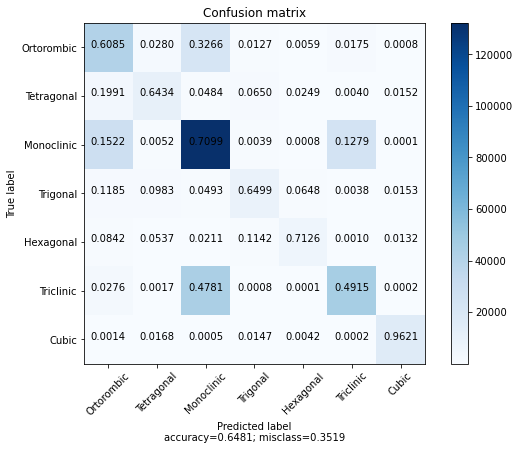

************************************
THRESHOLD 0.1  INDEXES TO DROP:  28305
LEN FILTERED  371838
LEN UNFILTERED  400143
Percentuale casi eliminati 7.07 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.55      0.62      0.58     62342
  Tetragonal       0.70      0.67      0.68     15077
  Monoclinic       0.67      0.73      0.70    172219
    Trigonal       0.71      0.67      0.69     12135
   Hexagonal       0.78      0.73      0.75      7893
   Triclinic       0.66      0.50      0.57     85653
       Cubic       0.96      0.97      0.96     16519

    accuracy                           0.66    371838
   macro avg       0.72      0.70      0.71    371838
weighted avg       0.67      0.66      0.66    371838


Accuracy: 0.66

Micro Precision: 0.66
Micro Recall: 0.66
Micro F1-score: 0.66

Macro Precision: 0.72
Macro Recall: 0.70
Macro F1-score: 0.71

Weighted Precision: 0.67
Weighted Recall: 0.66
Weighted F1-score: 0.66


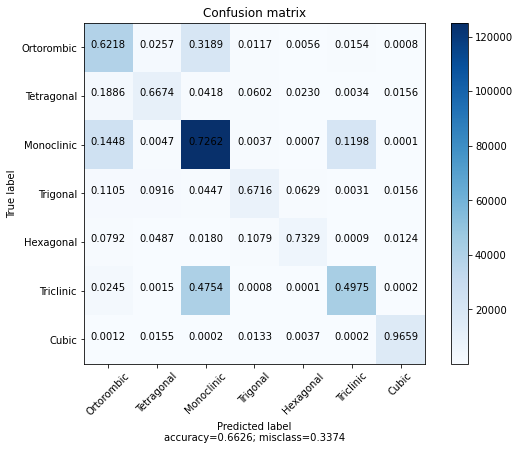

************************************
THRESHOLD 0.2  INDEXES TO DROP:  56719
LEN FILTERED  343424
LEN UNFILTERED  400143
Percentuale casi eliminati 14.17 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.57      0.64      0.60     57421
  Tetragonal       0.72      0.69      0.71     14241
  Monoclinic       0.68      0.74      0.71    158099
    Trigonal       0.73      0.69      0.71     11447
   Hexagonal       0.79      0.75      0.77      7562
   Triclinic       0.68      0.51      0.58     78231
       Cubic       0.96      0.97      0.97     16423

    accuracy                           0.68    343424
   macro avg       0.73      0.71      0.72    343424
weighted avg       0.68      0.68      0.67    343424


Accuracy: 0.68

Micro Precision: 0.68
Micro Recall: 0.68
Micro F1-score: 0.68

Macro Precision: 0.73
Macro Recall: 0.71
Macro F1-score: 0.72

Weighted Precision: 0.68
Weighted Recall: 0.68
Weighted F1-score: 0.67


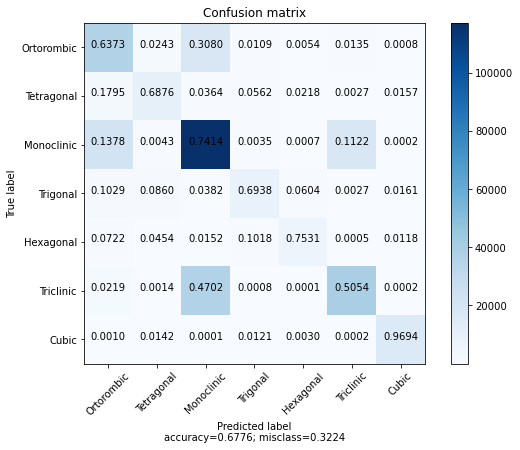

************************************
THRESHOLD 0.3  INDEXES TO DROP:  86387
LEN FILTERED  313756
LEN UNFILTERED  400143
Percentuale casi eliminati 21.59 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.59      0.65      0.62     52607
  Tetragonal       0.75      0.71      0.73     13407
  Monoclinic       0.69      0.76      0.72    142965
    Trigonal       0.74      0.72      0.73     10731
   Hexagonal       0.81      0.77      0.79      7294
   Triclinic       0.70      0.52      0.59     70416
       Cubic       0.97      0.97      0.97     16336

    accuracy                           0.69    313756
   macro avg       0.75      0.73      0.74    313756
weighted avg       0.70      0.69      0.69    313756


Accuracy: 0.69

Micro Precision: 0.69
Micro Recall: 0.69
Micro F1-score: 0.69

Macro Precision: 0.75
Macro Recall: 0.73
Macro F1-score: 0.74

Weighted Precision: 0.70
Weighted Recall: 0.69
Weighted F1-score: 0.69


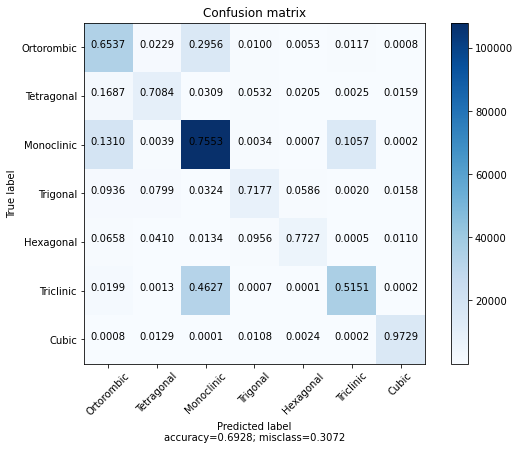

************************************
THRESHOLD 0.4  INDEXES TO DROP:  117623
LEN FILTERED  282520
LEN UNFILTERED  400143
Percentuale casi eliminati 29.4 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.61      0.67      0.64     47613
  Tetragonal       0.77      0.73      0.75     12558
  Monoclinic       0.70      0.77      0.73    126884
    Trigonal       0.76      0.74      0.75     10044
   Hexagonal       0.83      0.79      0.81      7008
   Triclinic       0.71      0.53      0.61     62172
       Cubic       0.97      0.98      0.97     16241

    accuracy                           0.71    282520
   macro avg       0.76      0.74      0.75    282520
weighted avg       0.71      0.71      0.71    282520


Accuracy: 0.71

Micro Precision: 0.71
Micro Recall: 0.71
Micro F1-score: 0.71

Macro Precision: 0.76
Macro Recall: 0.74
Macro F1-score: 0.75

Weighted Precision: 0.71
Weighted Recall: 0.71
Weighted F1-score: 0.71


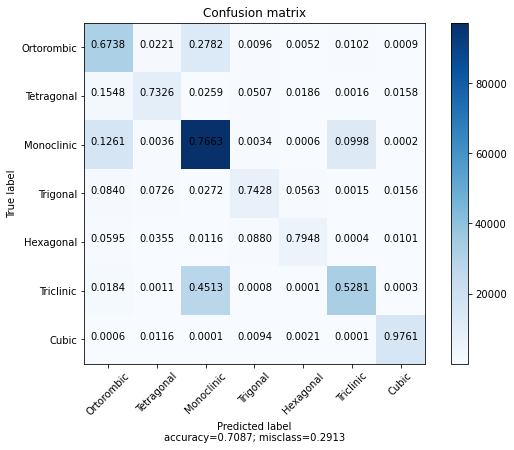

************************************
THRESHOLD 0.5  INDEXES TO DROP:  151539
LEN FILTERED  248604
LEN UNFILTERED  400143
Percentuale casi eliminati 37.87 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.63      0.70      0.67     42312
  Tetragonal       0.79      0.76      0.77     11713
  Monoclinic       0.71      0.77      0.74    109044
    Trigonal       0.78      0.77      0.78      9397
   Hexagonal       0.84      0.81      0.83      6737
   Triclinic       0.73      0.55      0.63     53264
       Cubic       0.97      0.98      0.97     16137

    accuracy                           0.73    248604
   macro avg       0.78      0.76      0.77    248604
weighted avg       0.73      0.73      0.72    248604


Accuracy: 0.73

Micro Precision: 0.73
Micro Recall: 0.73
Micro F1-score: 0.73

Macro Precision: 0.78
Macro Recall: 0.76
Macro F1-score: 0.77

Weighted Precision: 0.73
Weighted Recall: 0.73
Weighted F1-score: 0.72


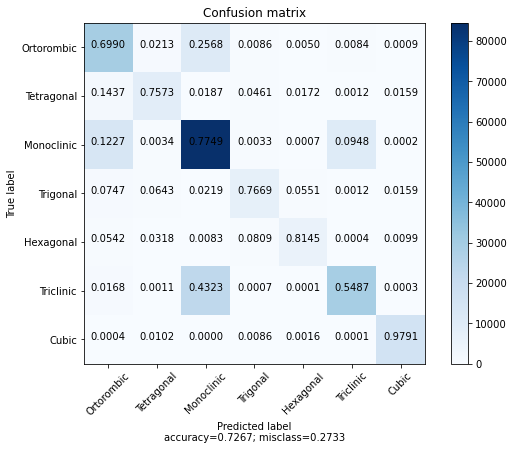

************************************
THRESHOLD 0.6  INDEXES TO DROP:  188321
LEN FILTERED  211822
LEN UNFILTERED  400143
Percentuale casi eliminati 47.06 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.66      0.73      0.69     36604
  Tetragonal       0.82      0.78      0.80     10864
  Monoclinic       0.73      0.78      0.75     89156
    Trigonal       0.80      0.79      0.80      8771
   Hexagonal       0.86      0.84      0.85      6473
   Triclinic       0.75      0.58      0.66     43916
       Cubic       0.97      0.98      0.98     16038

    accuracy                           0.75    211822
   macro avg       0.80      0.78      0.79    211822
weighted avg       0.75      0.75      0.75    211822


Accuracy: 0.75

Micro Precision: 0.75
Micro Recall: 0.75
Micro F1-score: 0.75

Macro Precision: 0.80
Macro Recall: 0.78
Macro F1-score: 0.79

Weighted Precision: 0.75
Weighted Recall: 0.75
Weighted F1-score: 0.75


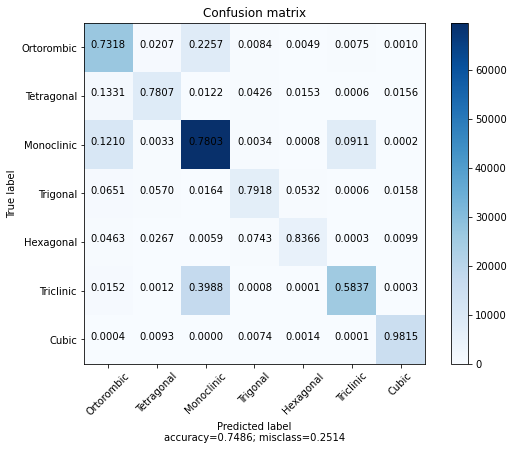

************************************
THRESHOLD 0.7  INDEXES TO DROP:  229374
LEN FILTERED  170769
LEN UNFILTERED  400143
Percentuale casi eliminati 57.32 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.69      0.78      0.73     30294
  Tetragonal       0.84      0.81      0.82      9941
  Monoclinic       0.75      0.78      0.76     66518
    Trigonal       0.82      0.82      0.82      8056
   Hexagonal       0.88      0.86      0.87      6149
   Triclinic       0.78      0.63      0.70     33918
       Cubic       0.97      0.98      0.98     15893

    accuracy                           0.78    170769
   macro avg       0.82      0.81      0.81    170769
weighted avg       0.78      0.78      0.77    170769


Accuracy: 0.78

Micro Precision: 0.78
Micro Recall: 0.78
Micro F1-score: 0.78

Macro Precision: 0.82
Macro Recall: 0.81
Macro F1-score: 0.81

Weighted Precision: 0.78
Weighted Recall: 0.78
Weighted F1-score: 0.77


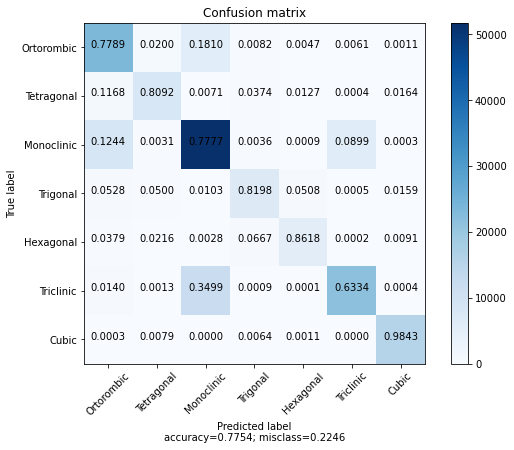

************************************
THRESHOLD 0.8  INDEXES TO DROP:  273829
LEN FILTERED  126314
LEN UNFILTERED  400143
Percentuale casi eliminati 68.43 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.73      0.84      0.78     23365
  Tetragonal       0.87      0.85      0.86      8807
  Monoclinic       0.78      0.76      0.77     42118
    Trigonal       0.85      0.85      0.85      7240
   Hexagonal       0.89      0.89      0.89      5800
   Triclinic       0.80      0.71      0.75     23338
       Cubic       0.98      0.99      0.98     15646

    accuracy                           0.81    126314
   macro avg       0.84      0.84      0.84    126314
weighted avg       0.81      0.81      0.81    126314


Accuracy: 0.81

Micro Precision: 0.81
Micro Recall: 0.81
Micro F1-score: 0.81

Macro Precision: 0.84
Macro Recall: 0.84
Macro F1-score: 0.84

Weighted Precision: 0.81
Weighted Recall: 0.81
Weighted F1-score: 0.81


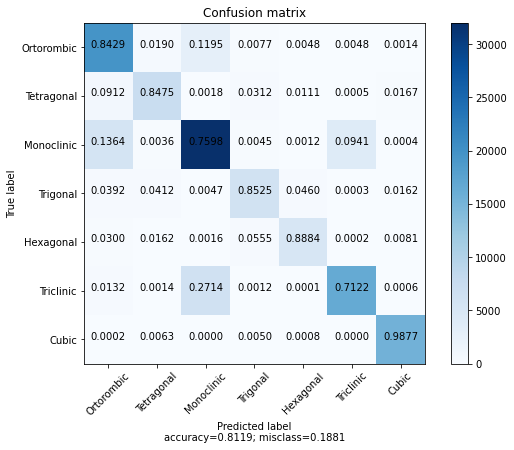

************************************
THRESHOLD 0.9  INDEXES TO DROP:  320324
LEN FILTERED  79819
LEN UNFILTERED  400143
Percentuale casi eliminati 80.05 %

Classification Report

              precision    recall  f1-score   support

  Ortorombic       0.79      0.92      0.85     15778
  Tetragonal       0.91      0.89      0.90      7343
  Monoclinic       0.83      0.69      0.75     17292
    Trigonal       0.89      0.89      0.89      6202
   Hexagonal       0.92      0.93      0.92      5329
   Triclinic       0.84      0.84      0.84     12627
       Cubic       0.98      0.99      0.99     15248

    accuracy                           0.87     79819
   macro avg       0.88      0.88      0.88     79819
weighted avg       0.87      0.87      0.87     79819


Accuracy: 0.87

Micro Precision: 0.87
Micro Recall: 0.87
Micro F1-score: 0.87

Macro Precision: 0.88
Macro Recall: 0.88
Macro F1-score: 0.88

Weighted Precision: 0.87
Weighted Recall: 0.87
Weighted F1-score: 0.87


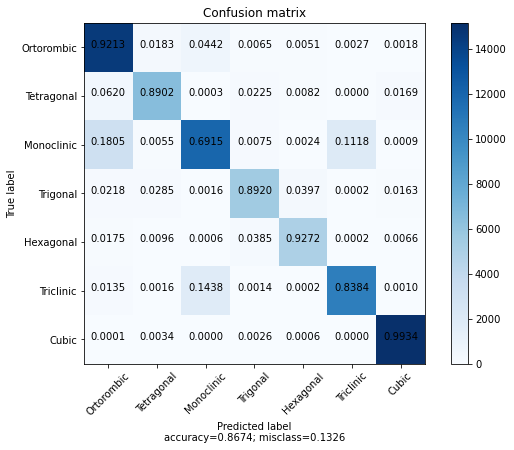

In [13]:
for thr_value in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    threshold=thr_value
    indexes_to_drop=[]
    count=0
    for index, row in results.iterrows():
        conf = row['conf']
        if conf <= threshold:
            indexes_to_drop.append(index)
    print('************************************')
    print('THRESHOLD', threshold, ' INDEXES TO DROP: ', len(indexes_to_drop))
    filtered_results = results[~results.index.isin(indexes_to_drop)].copy()
    print('LEN FILTERED ', len(filtered_results))
    print('LEN UNFILTERED ', len(results))
    percent_dropped = round(len(indexes_to_drop)/len(results)*100, 2)
    print("Percentuale casi eliminati", percent_dropped,"%")
    labels = filtered_results['class'].values
    labels=labels.astype(int)
    probabilities=filtered_results[[0,1,2,3,4,5,6]]
    preds = probabilities.apply(np.argmax, axis=1).values
    accuracy = print_scores(labels, preds)
    thr = len(confidence)
    confidence.loc[thr]=[threshold, accuracy, percent_dropped]

---

In [14]:
confidence

,Threshold,Accuracy,% dropped
0,0.0,0.648106,0.00
1,0.1,0.662641,7.07
2,0.2,0.677556,14.17
3,0.3,0.692777,21.59
4,0.4,0.708746,29.40
5,0.5,0.726726,37.87
6,0.6,0.748591,47.06
7,0.7,0.775351,57.32
8,0.8,0.811945,68.43
9,0.9,0.867438,80.05
